In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
import scipy.stats as stats

sns.set() # Seaborn's default settings look much nicer than matplotlib

df = pd.read_csv('Regression price.csv')

Data = df[['Ending stocks to use ratio','Farm price ($/metric ton)','Year']]
Data = Data.sort_values(by=['Ending stocks to use ratio'], ascending=True)
#Data.head()

X = Data['Ending stocks to use ratio']
Y = Data['Farm price ($/metric ton)']
L = Data['Year']

In [72]:
df.head()

,Year,Farm price ($/metric ton),Production( million metric tons),Ending Stock(metric tons),use to ending ratio,Ending stocks to use ratio
0,2019,320,96.8,11.6,9.474138,0.105551
1,2018,312,120.5,24.7,4.360324,0.229341
2,2017,343,120.1,11.9,9.781513,0.102234
3,2016,348,116.9,8.2,13.914634,0.071867
4,2015,329,106.8,5.4,19.740741,0.050657


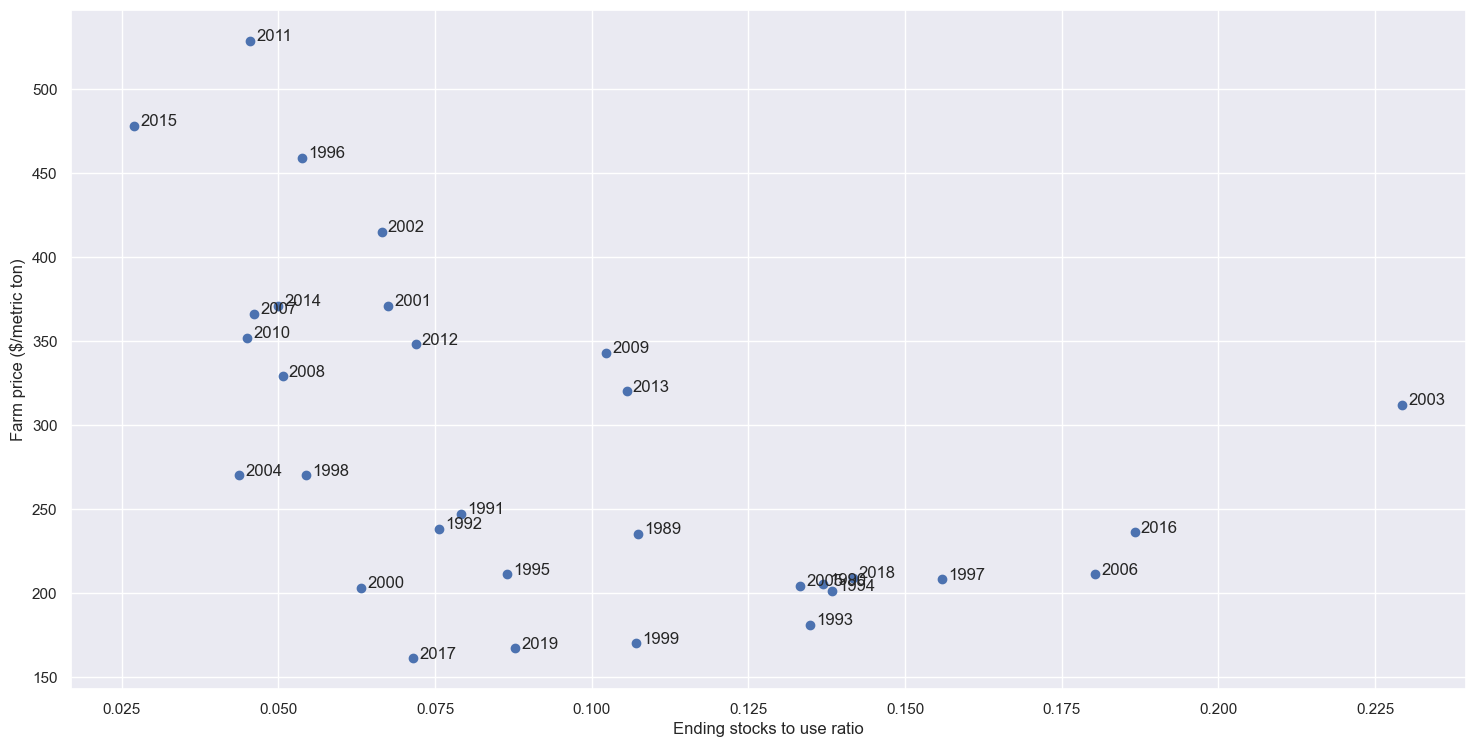

In [73]:
plt.figure(figsize=(18,9),dpi=100)
plt.plot(X, Y, 'o', label='original data')

for i, txt in enumerate(L):
    plt.annotate(txt, (X[i], Y[i]), xytext=(X[i]+0.001, Y[i]))

plt.xlabel('Ending stocks to use ratio')
plt.ylabel('Farm price ($/metric ton)')

plt.show()
#fig.savefig('price&ratio.png', dpi=300)

R-squared: 0.255919
p-value: 0.000014


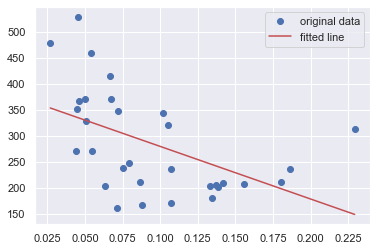

In [74]:
# linear regression
import scipy
# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
res = scipy.stats.linregress(X, Y)
print(f"R-squared: {res.rvalue**2:.6f}")
print(f"p-value: {res.pvalue**2:.6f}")

plt.plot(X, Y, 'o', label='original data')
plt.plot(X, res.intercept + res.slope*X, 'r', label='fitted line')
plt.legend()
plt.show()

p1 is :
             3             2
-4.706e+04 x + 3.558e+04 x - 7114 x + 632.1
R-squared:0.5098773688313569
p-values:6.457663197446032e-06
KruskalResult(statistic=0.3413864761143225, pvalue=0.5590300128748782)


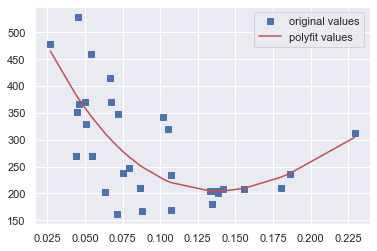

In [75]:
#  Polynomial regression
f1 = np.polyfit(X, Y, 3)
# p1 为拟合的多项式表达式
p1 = np.poly1d(f1)
print('p1 is :\n',p1)

plt.plot(X, Y, 's',label='original values')
Yvals = p1(X) #拟合y值
plt.plot(X, Yvals, 'r',label='polyfit values')
plt.legend()

coefficient_of_dermination = r2_score(Y, Yvals)
print('R-squared:' + str(coefficient_of_dermination))
r, p_values = stats.pearsonr(Y,Yvals)
print('p-values:' + str(p_values))
print(stats.kruskal(Y,Yvals))

R-squared:0.447603519042595
p-values:3.8750032427526843e-05
KruskalResult(statistic=0.392527547873681, pvalue=0.5309737985847316)


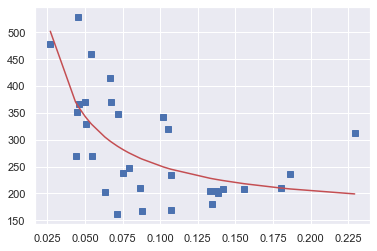

In [76]:
from scipy.optimize import curve_fit #nonlinear least squares
# 拟合自定义函数
def func(x, a, b):
    return a + b*(1/x)

# popt返回的是给定模型的最优参数。我们可以使用pcov的值检测拟合的质量，其对角线元素值代表着每个参数的方差。
popt, pcov = curve_fit(func, X, Y)
a = popt[0] 
b = popt[1]
Yvals = func(X,a,b) #拟合y值
plot1 = plt.plot(X, Y, 's',label='original values')
plot2 = plt.plot(X, Yvals, 'r',label='polyfit values')

coefficient_of_dermination = r2_score(Y, Yvals)
print('R-squared:' + str(coefficient_of_dermination))

r, p_values = stats.pearsonr(Y,Yvals)
print('p-values:' + str(p_values))

print(stats.kruskal(Y,Yvals))
#stats.friedmanchisquare(Y, Yvals)

In [77]:
###################################################################
 #Data 分为 before07 & after08 两部分分开回归 不合理！
###################################################################
Data2 = df[['Ending stocks to use ratio','Farm price ($/metric ton)','Year']]
Data2_Af08 = Data2.iloc[:12]
Data2_Bf08 = Data2.iloc[12:]

Data2_Af08 = Data2_Af08.sort_values(by=['Ending stocks to use ratio'], ascending=True)
Data2_Bf08 = Data2_Bf08.sort_values(by=['Ending stocks to use ratio'], ascending=True)
#Data.head()

XA = Data2_Af08['Ending stocks to use ratio']
YA = Data2_Af08['Farm price ($/metric ton)']
LA = Data2_Af08['Year']

XB = Data2_Bf08['Ending stocks to use ratio']
YB = Data2_Bf08['Farm price ($/metric ton)']
LB = Data2_Bf08['Year']

R-squared: 0.271805
p-value: 0.006751
R-squared: 0.105984
p-value: 0.030205


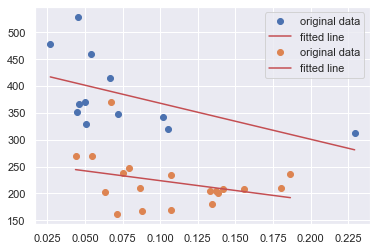

In [78]:
# linear regression
# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
res = scipy.stats.linregress(XA, YA)
print(f"R-squared: {res.rvalue**2:.6f}")
print(f"p-value: {res.pvalue**2:.6f}")

plt.plot(XA, YA, 'o', label='original data')
plt.plot(XA, res.intercept + res.slope*XA, 'r', label='fitted line')
plt.legend()

# XB YB
res = scipy.stats.linregress(XB, YB)
print(f"R-squared: {res.rvalue**2:.6f}")
print(f"p-value: {res.pvalue**2:.6f}")

plt.plot(XB, YB, 'o', label='original data')
plt.plot(XB, res.intercept + res.slope*XB, 'r', label='fitted line')
plt.legend()
plt.show()

p1 is :
       2
7559 x - 2630 x + 518.8
R-squared:0.38669752916733846
p-values:0.030859178231473678
KruskalResult(statistic=0.12000000000000455, pvalue=0.729034489538799)
p1 is :
            2
1.131e+04 x - 2947 x + 387.8
R-squared:0.2595621600355694
p-values:0.02587284918865187
KruskalResult(statistic=0.010443367914151088, pvalue=0.9186036443816498)


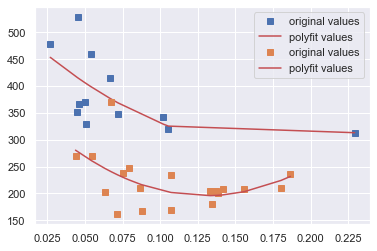

In [79]:
#  Polynomial regression
# XA YA
f1 = np.polyfit(XA, YA, 2)
# p1 为拟合的多项式表达式
p1 = np.poly1d(f1)
print('p1 is :\n',p1)

plt.plot(XA, YA, 's',label='original values')
Yvals = p1(XA) #拟合y值
plt.plot(XA, Yvals, 'r',label='polyfit values')
plt.legend()

coefficient_of_dermination = r2_score(YA, Yvals)
print('R-squared:' + str(coefficient_of_dermination))
r, p_values = stats.pearsonr(YA,Yvals)
print('p-values:' + str(p_values))
print(stats.kruskal(YA,Yvals))

# XB YB
f1 = np.polyfit(XB, YB, 2)
# p1 为拟合的多项式表达式
p1 = np.poly1d(f1)
print('p1 is :\n',p1)

plt.plot(XB, YB, 's',label='original values')
Yvals = p1(XB) #拟合y值
plt.plot(XB, Yvals, 'r',label='polyfit values')
plt.legend()

coefficient_of_dermination = r2_score(YB, Yvals)
print('R-squared:' + str(coefficient_of_dermination))
r, p_values = stats.pearsonr(YB,Yvals)
print('p-values:' + str(p_values))
print(stats.kruskal(YB,Yvals))

In [80]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(np.array([100* X, 1000 * X ** 2, 1e4 * X ** 3]).T, np.array(Y), test_size=0.2)

In [81]:
np.array([X_test, X_test ** 2]).T

array([[[2.69687160e+00, 7.27311643e+00],
        [1.86602871e+01, 3.48206315e+02],
        [7.15181930e+00, 5.11485193e+01],
        [4.50054880e+00, 2.02549395e+01],
        [6.64414410e+00, 4.41446508e+01],
        [2.29340761e+01, 5.25971847e+02],
        [1.36936937e+01, 1.87517247e+02]],

       [[7.27311643e-01, 5.28982226e-01],
        [3.48206315e+01, 1.21247638e+03],
        [5.11485193e+00, 2.61617103e+01],
        [2.02549395e+00, 4.10262574e+00],
        [4.41446508e+00, 1.94875020e+01],
        [5.25971847e+01, 2.76646383e+03],
        [1.87517247e+01, 3.51627180e+02]],

       [[1.96146611e-01, 3.84734931e-02],
        [6.49762980e+01, 4.22191930e+03],
        [3.65804967e+00, 1.33813274e+01],
        [9.11583437e-01, 8.30984362e-01],
        [2.93303421e+00, 8.60268969e+00],
        [1.20626784e+02, 1.45508209e+04],
        [2.56780375e+01, 6.59361608e+02]]])

In [82]:
X_test

array([[  2.6968716 ,   0.72731164,   0.19614661],
       [ 18.6602871 ,  34.82063147,  64.97629801],
       [  7.1518193 ,   5.11485193,   3.65804967],
       [  4.5005488 ,   2.02549395,   0.91158344],
       [  6.6441441 ,   4.41446508,   2.93303421],
       [ 22.9340761 ,  52.59718466, 120.62678355],
       [ 13.6936937 ,  18.75172471,  25.67803746]])

In [83]:

XX = np.linspace(-2, 6, 200)
np.random.shuffle(XX)
YY = 0.5 * -XX * XX + 2 + XX + 0.15 * np.random.randn(200,) 

X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.2)

In [85]:
model = Sequential()
# model.add(Dense(5, activation='sigmoid'))
# model.add(Dense(1))
model.add(Dense(100, input_dim=3,  kernel_initializer='random_normal',
    bias_initializer='zeros', activation="sigmoid"))
model.add(Dense(100, kernel_initializer='random_normal',
    bias_initializer='zeros', activation="sigmoid"))
model.add(Dense(1,  kernel_initializer='random_normal',
    bias_initializer='zero'))
opt = keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss='mse', optimizer=opt)
model.fit(X_train, y_train, epochs=100, batch_size=10)
model.output_shape

Epoch 1/100


ValueError: in user code:

    C:\Users\heish\anaconda3\envs\sklearn\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\heish\anaconda3\envs\sklearn\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\heish\anaconda3\envs\sklearn\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\heish\anaconda3\envs\sklearn\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\heish\anaconda3\envs\sklearn\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\heish\anaconda3\envs\sklearn\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\heish\anaconda3\envs\sklearn\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\heish\anaconda3\envs\sklearn\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\heish\anaconda3\envs\sklearn\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape [10, 1]


In [ ]:
model.get_weights()

In [ ]:
y_pred = model.predict(X_test)
plt.scatter(X_train[:,0], y_train)
plt.scatter(X_test[:,0], y_test)
plt.plot(X_test[:,0], y_pred)
plt.show()

In [ ]:
y_pred = model.predict(X_train)
plt.scatter(X_train[:,0], y_train)
plt.scatter(X_test[:,0], y_test)
plt.plot(X_train[:,0], y_pred)
plt.show()

In [ ]:
y_pred

In [ ]:
X_test